# LEZIONE 11 - Validazione dei Modelli

---

## Obiettivi della Lezione

Al termine di questa lezione sarai in grado di:

1. Comprendere perche la validazione e essenziale nel machine learning
2. Implementare correttamente train/test split e capire i suoi limiti
3. Applicare la cross-validation come metodo piu robusto
4. Capire perche l'accuracy da sola puo ingannare
5. Usare metriche appropriate: Precision, Recall, F1-Score
6. Evitare errori comuni che invalidano i risultati

---

## Prerequisiti

- Lezione 8: Overfitting e Generalizzazione
- Lezione 9-10: Random Forest e Gradient Boosting
- numpy, pandas, matplotlib, scikit-learn

---

## Indice

1. SEZIONE 1 - Teoria
2. SEZIONE 2 - Mappa Mentale
3. SEZIONE 3 - Quaderno Dimostrativo
4. SEZIONE 4 - Metodi e Funzioni
5. SEZIONE 5 - Glossario
6. SEZIONE 6 - Errori Comuni
7. SEZIONE 7 - Conclusione
8. SEZIONE 8 - Checklist
9. SEZIONE 9 - Changelog

# SEZIONE 1 - Teoria

---

## 1.1 Il Problema Fondamentale

La performance sui dati di training NON garantisce la performance su dati nuovi.

Esempio:
- Modello con 95% accuracy sul training set
- 70% accuracy su dati nuovi

Senza validazione corretta, non lo saprai mai fino a quando sara troppo tardi.

---

## 1.2 L'Analogia dell'Esame

| Situazione | Analogia ML |
|------------|-------------|
| Studia le domande dell'anno scorso | Addestramento |
| Viene interrogato sulle stesse domande | Test sul training set |
| Viene interrogato su domande nuove | Test su dati mai visti |

Testare sul training set misura la memorizzazione, non la generalizzazione.

---

## 1.3 Definizioni Fondamentali

| Termine | Definizione |
|---------|-------------|
| Training Set | Dati usati per addestrare il modello |
| Test Set | Dati usati per valutare la performance finale |
| Validation Set | Dati usati per tuning degli iperparametri |
| Generalizzazione | Capacita di performare bene su dati nuovi |
| Overfitting | Il modello memorizza invece di imparare |

---

## 1.4 Train/Test Split

La tecnica piu semplice per stimare la performance di generalizzazione:

1. Dividi i dati in due parti
2. Addestra il modello sulla prima parte (training set)
3. Valuta la performance sulla seconda parte (test set)

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
```

---

## 1.5 Parametri del Train/Test Split

| Parametro | Significato | Valori tipici |
|-----------|-------------|---------------|
| test_size | Frazione per il test | 0.2 - 0.3 |
| random_state | Seed per riproducibilita | Qualsiasi intero |
| stratify | Mantiene proporzioni classi | y per classificazione |
| shuffle | Mescola prima di dividere | True (default) |

---

## 1.6 Perche stratify e Importante

Se hai un dataset sbilanciato (es. 90% classe 0, 10% classe 1):

| Senza stratify | Con stratify |
|----------------|--------------|
| Split casuale | Split stratificato |
| Test set potrebbe avere 95% classe 0 | Test set ha 90% classe 0 |
| Stima distorta | Stima rappresentativa |

---

## 1.7 Limiti del Train/Test Split

1. Dipendenza dallo split: cambiando random_state, i risultati cambiano
2. Varianza alta: con pochi dati, la stima e instabile
3. Spreco di dati: il 25% dei dati non viene mai usato per l'addestramento

---

## 1.8 K-Fold Cross-Validation

Risolve il problema della variabilita del singolo split:

```
Fold 1: [TEST][training training training]  -> Score 1
Fold 2: [training][TEST][training training]  -> Score 2  
Fold 3: [training training][TEST][training]  -> Score 3
Fold 4: [training training training][TEST]  -> Score 4
---------------------------------------------------------
                                          Media +/- Std
```

Come Funziona:
1. Dividi il dataset in K parti uguali
2. Per ogni iterazione: usa 1 fold come test, K-1 come training
3. Risultato finale: Media e std dei K score

---

## 1.9 Vantaggi della Cross-Validation

| Aspetto | Train/Test Split | K-Fold CV |
|---------|-----------------|-----------|
| Dati usati per test | Solo una porzione | Tutti (a turno) |
| Stima della variabilita | Nessuna | Si (std dei fold) |
| Affidabilita | Dipende dal random split | Robusta |
| Costo computazionale | 1 training | K training |

---

## 1.10 Valori Tipici di K

- K = 5: Buon compromesso (standard per dataset medi)
- K = 10: Maggiore affidabilita, piu lento
- K = n (LOO): Leave-One-Out, massima varianza ma costoso

---

## 1.11 Perche l'Accuracy Mente

L'accuracy e fuorviante con classi sbilanciate:

```
Esempio: Fraud Detection
Dataset: 10.000 transazioni
  - 9.900 legittime (99%)
  - 100 fraudolente (1%)

Modello "stupido" che predice SEMPRE "legittima":
  Accuracy = 9.900 / 10.000 = 99.0%

Ma quante frodi ha catturato? ZERO!
```

---

## 1.12 Confusion Matrix

```
                    Predetto
                 Neg     Pos
              +-------+-------+
Reale  Neg    |  TN   |  FP   |  -> Specificity = TN/(TN+FP)
              +-------+-------+
       Pos    |  FN   |  TP   |  -> Recall = TP/(TP+FN)
              +-------+-------+
                  |
              Precision = TP/(TP+FP)
```

---

## 1.13 Le 4 Metriche Fondamentali

| Metrica | Formula | Risponde a... |
|---------|---------|---------------|
| Accuracy | (TP+TN) / All | Quanti ne ho classificati giusti in totale? |
| Precision | TP / (TP+FP) | Dei positivi predetti, quanti sono veri? |
| Recall | TP / (TP+FN) | Dei positivi reali, quanti ho trovato? |
| F1-Score | 2*(P*R)/(P+R) | Bilancio tra precision e recall |

---

## 1.14 Quando Usare Quale Metrica

| Scenario | Priorita | Perche |
|----------|----------|--------|
| Spam filter | Precision | Meglio qualche spam, che email importanti perse |
| Diagnosi medica | Recall | Meglio falsi allarmi, che malattie non rilevate |
| Bilanciato | F1-Score | Compromesso tra le due |
| Dataset bilanciato | Accuracy | Stima affidabile |
| Dataset sbilanciato | F1, Precision, Recall | Accuracy ingannevole |

# SEZIONE 2 - Mappa Mentale

---

## Flusso Decisionale: Validazione

```
DEVO VALIDARE UN MODELLO
          |
          v
    [Quanto dataset ho?]
             |
     +-------+-------+
     |               |
     v               v
  < 1000          > 1000
  samples         samples
     |               |
     v               v
  K-Fold CV      Train/Test
  K = 10+         + K-Fold CV
                    K = 5
```

---

## Quale Metrica Usare

```
IL MIO DATASET E BILANCIATO?
(Classe minore > 30%?)
          |
     +----+----+
     |         |
     v         v
    SI        NO
     |         |
     v         v
 Accuracy   F1-Score
  e ok      Precision
            Recall

QUALE TRA PRECISION E RECALL?

Falsi Positivi sono gravi? -> PRECISION
   (es. spam filter)

Falsi Negativi sono gravi? -> RECALL
   (es. diagnosi medica)

Entrambi importanti? -> F1-SCORE
```

---

## Workflow di Validazione Completo

```
1. CONTROLLA BILANCIAMENTO
   |
   v
2. SCEGLI METRICHE APPROPRIATE
   |
   v
3. USA CROSS-VALIDATION (K=5 o K=10)
   |
   v
4. RIPORTA MEDIA +/- STD
   |
   v
5. VALUTA IL GAP TRAIN-TEST
```

---

## Checklist Pre-Validazione

```
[ ] Ho separato train e test PRIMA del preprocessing?
[ ] Ho controllato il bilanciamento delle classi?
[ ] Ho scelto le metriche appropriate?
[ ] Uso cross-validation (non solo un singolo split)?
[ ] Riporto la std oltre alla media?
```

# SEZIONE 3 - Quaderno Dimostrativo

In questa sezione applichiamo i concetti appresi attraverso esercizi pratici.
Ogni esercizio include:
- Obiettivo chiaro
- Spiegazione del "perche" di ogni passaggio
- Micro-checkpoint con assert per verificare la correttezza

Micro-checkpoint 1: Dataset creato correttamente
Micro-checkpoint 2: Esperimenti completati


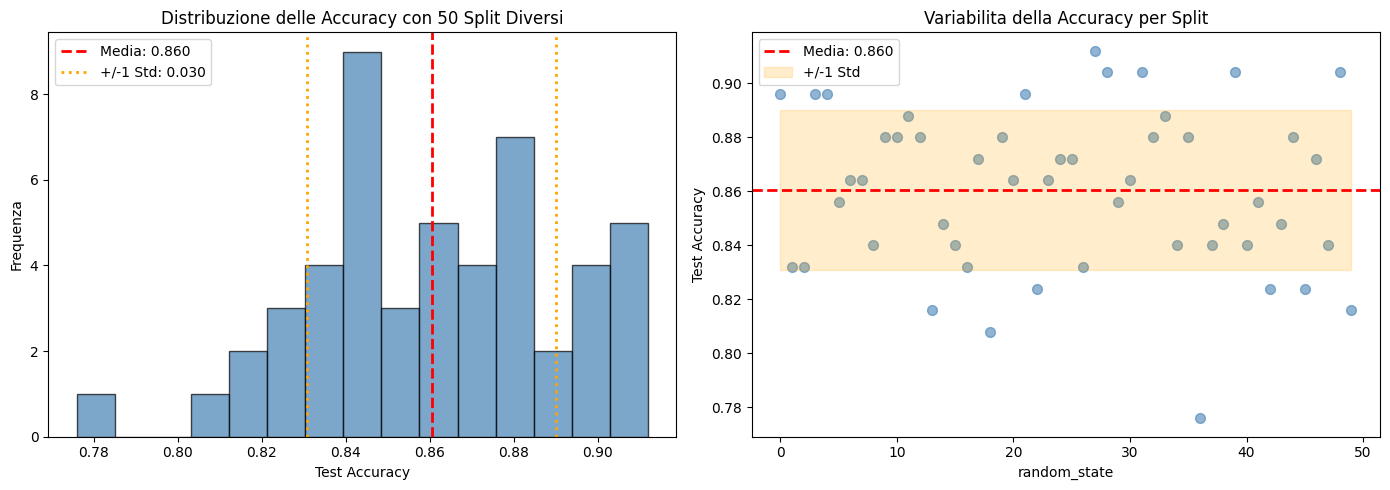


RISULTATI:
- Accuracy media:   0.8605
- Std deviation:    0.0297
- Range:            [0.7760, 0.9120]
- Variazione:       13.6%

CONCLUSIONE: Un singolo split puo dare risultati fuorvianti!


In [9]:
# === ESERCIZIO 1: Variabilita del Train/Test Split ===
# Perche: dimostriamo che un singolo split da risultati variabili
#         e quindi inaffidabili

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Creiamo un dataset
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=5,
    flip_y=0.1, random_state=42
)

# --- MICRO-CHECKPOINT ---
assert X.shape == (500, 10), "Dataset deve avere 500 campioni e 10 features"
print("Micro-checkpoint 1: Dataset creato correttamente")

# Testiamo con diversi random_state
random_states = range(0, 50)
accuracies = []

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=rs
    )
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

# Statistiche
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
min_acc = np.min(accuracies)
max_acc = np.max(accuracies)

# --- MICRO-CHECKPOINT ---
assert len(accuracies) == 50, "Devono esserci 50 accuracy"
assert 0 < mean_acc < 1, "Mean accuracy deve essere valida"
print("Micro-checkpoint 2: Esperimenti completati")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.hist(accuracies, bins=15, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_acc:.3f}')
ax1.axvline(mean_acc - std_acc, color='orange', linestyle=':', linewidth=2)
ax1.axvline(mean_acc + std_acc, color='orange', linestyle=':', linewidth=2, label=f'+/-1 Std: {std_acc:.3f}')
ax1.set_xlabel('Test Accuracy')
ax1.set_ylabel('Frequenza')
ax1.set_title('Distribuzione delle Accuracy con 50 Split Diversi')
ax1.legend()

ax2 = axes[1]
ax2.scatter(random_states, accuracies, c='steelblue', alpha=0.6, s=50)
ax2.axhline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_acc:.3f}')
ax2.fill_between(random_states, mean_acc - std_acc, mean_acc + std_acc, 
                  color='orange', alpha=0.2, label='+/-1 Std')
ax2.set_xlabel('random_state')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Variabilita della Accuracy per Split')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nRISULTATI:")
print(f"- Accuracy media:   {mean_acc:.4f}")
print(f"- Std deviation:    {std_acc:.4f}")
print(f"- Range:            [{min_acc:.4f}, {max_acc:.4f}]")
print(f"- Variazione:       {(max_acc - min_acc)*100:.1f}%")
print("\nCONCLUSIONE: Un singolo split puo dare risultati fuorvianti!")

Micro-checkpoint 1: Modelli definiti
CONFRONTO: CROSS-VALIDATION (K=5)

Decision Tree:
  Scores per fold: ['0.770', '0.730', '0.810', '0.770', '0.790']
  Accuracy media:  0.7740
  Std deviation:   0.0265

Random Forest:
  Scores per fold: ['0.870', '0.850', '0.860', '0.850', '0.870']
  Accuracy media:  0.8600
  Std deviation:   0.0089

Gradient Boosting:
  Scores per fold: ['0.850', '0.840', '0.880', '0.830', '0.860']
  Accuracy media:  0.8520
  Std deviation:   0.0172

Micro-checkpoint 2: Cross-validation completata


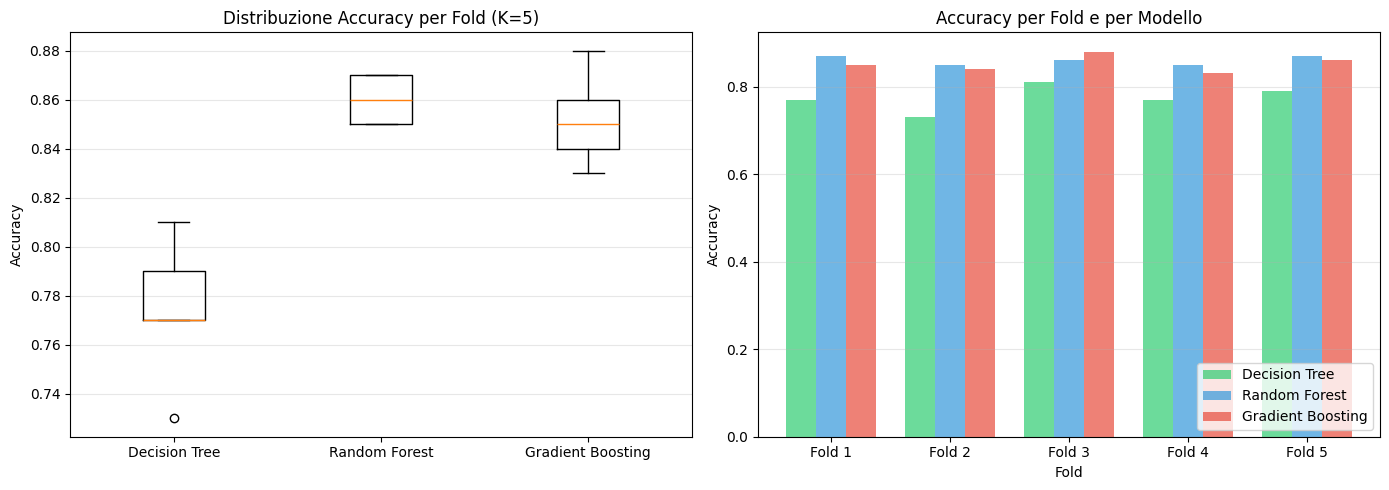


INTERPRETAZIONE:
- Std bassa = modello stabile
- Std alta = modello instabile (rischio overfitting)


In [10]:
# === ESERCIZIO 2: Cross-Validation vs Single Split ===
# Perche: la cross-validation risolve il problema della variabilita
#         e fornisce una stima piu robusta

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Modelli da confrontare
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Cross-Validation con K=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- MICRO-CHECKPOINT ---
assert len(models) == 3, "Devono esserci 3 modelli"
print("Micro-checkpoint 1: Modelli definiti")

print("=" * 70)
print("CONFRONTO: CROSS-VALIDATION (K=5)")
print("=" * 70)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[name] = scores
    
    print(f"\n{name}:")
    print(f"  Scores per fold: {[f'{s:.3f}' for s in scores]}")
    print(f"  Accuracy media:  {scores.mean():.4f}")
    print(f"  Std deviation:   {scores.std():.4f}")

# --- MICRO-CHECKPOINT ---
assert all(len(s) == 5 for s in results.values()), "Ogni modello deve avere 5 scores"
print("\nMicro-checkpoint 2: Cross-validation completata")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.boxplot(results.values(), labels=results.keys())
ax1.set_ylabel('Accuracy')
ax1.set_title('Distribuzione Accuracy per Fold (K=5)')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[1]
colors = ['#2ecc71', '#3498db', '#e74c3c']
x_pos = np.arange(5)
width = 0.25

for i, (name, scores) in enumerate(results.items()):
    ax2.bar(x_pos + i*width, scores, width, label=name, color=colors[i], alpha=0.7)

ax2.set_xlabel('Fold')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy per Fold e per Modello')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax2.legend(loc='lower right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETAZIONE:")
print("- Std bassa = modello stabile")
print("- Std alta = modello instabile (rischio overfitting)")

Micro-checkpoint 1: Dataset sbilanciato creato
Distribuzione: Classe 0 = 573, Classe 1 = 27

CONFRONTO: MODELLO STUPIDO vs RANDOM FOREST

--- MODELLO STUPIDO (predice sempre classe 0) ---
  Accuracy:  0.955  <- Sembra buono!
  Precision: 0.000  <- Rivela il problema
  Recall:    0.000  <- ZERO!
  F1-Score:  0.000

--- RANDOM FOREST ---
  Accuracy:  0.965
  Precision: 1.000
  Recall:    0.222  <- Trova la classe rara!
  F1-Score:  0.364

Micro-checkpoint 2: Confronto completato


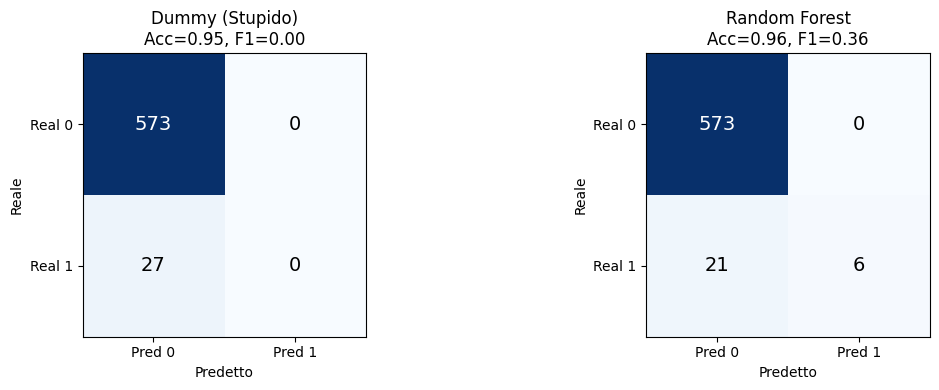


LEZIONE CHIAVE:
- Il modello stupido ha accuracy 95%, ma recall 0%
- In dataset sbilanciati, usa SEMPRE F1, Precision, Recall


In [11]:
# === ESERCIZIO 3: L'Accuracy Ingannevole con Dataset Sbilanciato ===
# Perche: dimostriamo che l'accuracy puo ingannare
#         quando le classi non sono bilanciate

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix)

# Creiamo un dataset MOLTO sbilanciato (95% classe 0, 5% classe 1)
np.random.seed(42)
X_imb, y_imb = make_classification(
    n_samples=2000, n_features=10, n_informative=5, n_redundant=2,
    weights=[0.95, 0.05], flip_y=0.01, random_state=42
)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42
)

# --- MICRO-CHECKPOINT ---
assert sum(y_imb==1) < sum(y_imb==0) * 0.1, "Dataset deve essere sbilanciato"
print("Micro-checkpoint 1: Dataset sbilanciato creato")
print(f"Distribuzione: Classe 0 = {sum(y_test_imb==0)}, Classe 1 = {sum(y_test_imb==1)}")

# Due modelli: uno "stupido" e uno vero
dummy = DummyClassifier(strategy='most_frequent')
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dummy.fit(X_train_imb, y_train_imb)
rf.fit(X_train_imb, y_train_imb)

y_pred_dummy = dummy.predict(X_test_imb)
y_pred_rf = rf.predict(X_test_imb)

print("\n" + "=" * 60)
print("CONFRONTO: MODELLO STUPIDO vs RANDOM FOREST")
print("=" * 60)

print("\n--- MODELLO STUPIDO (predice sempre classe 0) ---")
print(f"  Accuracy:  {accuracy_score(y_test_imb, y_pred_dummy):.3f}  <- Sembra buono!")
print(f"  Precision: {precision_score(y_test_imb, y_pred_dummy, zero_division=0):.3f}  <- Rivela il problema")
print(f"  Recall:    {recall_score(y_test_imb, y_pred_dummy, zero_division=0):.3f}  <- ZERO!")
print(f"  F1-Score:  {f1_score(y_test_imb, y_pred_dummy, zero_division=0):.3f}")

print("\n--- RANDOM FOREST ---")
print(f"  Accuracy:  {accuracy_score(y_test_imb, y_pred_rf):.3f}")
print(f"  Precision: {precision_score(y_test_imb, y_pred_rf):.3f}")
print(f"  Recall:    {recall_score(y_test_imb, y_pred_rf):.3f}  <- Trova la classe rara!")
print(f"  F1-Score:  {f1_score(y_test_imb, y_pred_rf):.3f}")

# --- MICRO-CHECKPOINT ---
assert recall_score(y_test_imb, y_pred_dummy, zero_division=0) == 0, "Dummy deve avere recall 0"
assert recall_score(y_test_imb, y_pred_rf) > 0, "RF deve avere recall > 0"
print("\nMicro-checkpoint 2: Confronto completato")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, (name, y_pred) in zip(axes, [('Dummy (Stupido)', y_pred_dummy), 
                                       ('Random Forest', y_pred_rf)]):
    cm = confusion_matrix(y_test_imb, y_pred)
    im = ax.imshow(cm, cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Pred 0', 'Pred 1'])
    ax.set_yticklabels(['Real 0', 'Real 1'])
    ax.set_xlabel('Predetto')
    ax.set_ylabel('Reale')
    ax.set_title(f'{name}\nAcc={accuracy_score(y_test_imb, y_pred):.2f}, '
                 f'F1={f1_score(y_test_imb, y_pred, zero_division=0):.2f}')
    
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", 
                   color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=14)

plt.tight_layout()
plt.show()

print("\nLEZIONE CHIAVE:")
print("- Il modello stupido ha accuracy 95%, ma recall 0%")
print("- In dataset sbilanciati, usa SEMPRE F1, Precision, Recall")

Micro-checkpoint 1: Tutte le strategie eseguite
CONFRONTO STRATEGIE DI VALIDAZIONE

10 Train/Test Split:
  Media:  0.8690
  Std:    0.0198
  Range:  [0.8350, 0.9050]

5-Fold CV:
  Media:  0.8612
  Std:    0.0310
  Range:  [0.8063, 0.8938]

10-Fold CV:
  Media:  0.8637
  Std:    0.0298
  Range:  [0.8000, 0.9000]

Micro-checkpoint 2: Analisi completata


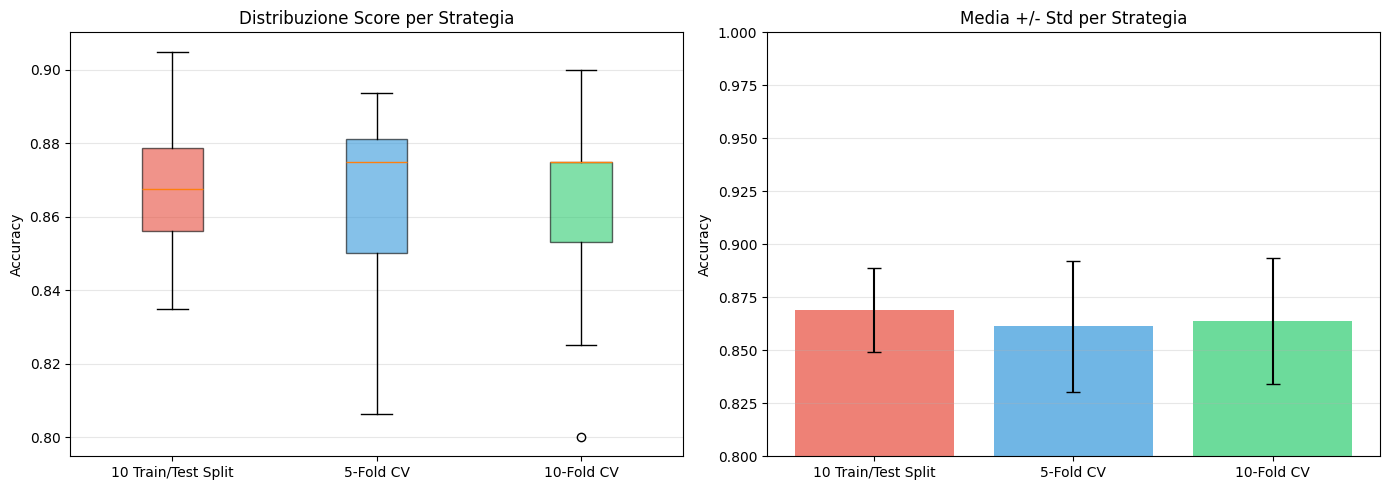


CONCLUSIONE: Cross-Validation e sempre preferibile a singoli split!


In [12]:
# === ESERCIZIO 4: Confronto Strategie di Validazione ===
# Perche: confrontiamo i risultati di diversi metodi di validazione
#         per capire quale e piu affidabile

from sklearn.model_selection import StratifiedKFold

# Nuovo dataset
X_val, y_val = make_classification(
    n_samples=800, n_features=15, n_informative=8,
    n_redundant=3, flip_y=0.1, random_state=42
)

model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Strategia A: 10 train/test split con random_state diversi
split_scores = []
for rs in range(10):
    X_tr, X_te, y_tr, y_te = train_test_split(X_val, y_val, test_size=0.25, random_state=rs)
    model.fit(X_tr, y_tr)
    split_scores.append(model.score(X_te, y_te))

# Strategia B: 5-Fold Cross-Validation
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv5_scores = cross_val_score(model, X_val, y_val, cv=cv5, scoring='accuracy')

# Strategia C: 10-Fold Cross-Validation
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv10_scores = cross_val_score(model, X_val, y_val, cv=cv10, scoring='accuracy')

# --- MICRO-CHECKPOINT ---
assert len(split_scores) == 10, "Devono esserci 10 split scores"
assert len(cv5_scores) == 5, "Devono esserci 5 CV5 scores"
assert len(cv10_scores) == 10, "Devono esserci 10 CV10 scores"
print("Micro-checkpoint 1: Tutte le strategie eseguite")

strategies = {
    '10 Train/Test Split': split_scores,
    '5-Fold CV': cv5_scores,
    '10-Fold CV': cv10_scores
}

print("=" * 60)
print("CONFRONTO STRATEGIE DI VALIDAZIONE")
print("=" * 60)

for name, scores in strategies.items():
    print(f"\n{name}:")
    print(f"  Media:  {np.mean(scores):.4f}")
    print(f"  Std:    {np.std(scores):.4f}")
    print(f"  Range:  [{np.min(scores):.4f}, {np.max(scores):.4f}]")

# --- MICRO-CHECKPOINT ---
print("\nMicro-checkpoint 2: Analisi completata")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
bp = ax1.boxplot(list(strategies.values()), labels=list(strategies.keys()), patch_artist=True)
colors = ['#e74c3c', '#3498db', '#2ecc71']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax1.set_ylabel('Accuracy')
ax1.set_title('Distribuzione Score per Strategia')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[1]
means = [np.mean(s) for s in strategies.values()]
stds = [np.std(s) for s in strategies.values()]
x_pos = range(len(strategies))

bars = ax2.bar(x_pos, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(list(strategies.keys()))
ax2.set_ylabel('Accuracy')
ax2.set_title('Media +/- Std per Strategia')
ax2.set_ylim(0.8, 1.0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCONCLUSIONE: Cross-Validation e sempre preferibile a singoli split!")

# === ESERCIZIO 5: Analisi Completa delle Metriche ===
# Perche: calcoliamo e interpretiamo tutte le metriche di classificazione
#         su un dataset sbilanciato

from sklearn.metrics import classification_report

# Dataset sbilanciato (90%-10%)
X_metr, y_metr = make_classification(
    n_samples=1500, n_features=12, n_informative=6,
    weights=[0.90, 0.10], flip_y=0.02, random_state=42
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_metr, y_metr, test_size=0.3, random_state=42, stratify=y_metr
)

# --- MICRO-CHECKPOINT ---
assert np.mean(y_metr==1) < 0.15, "Classe 1 deve essere minoritaria"
print("Micro-checkpoint 1: Dataset preparato")
print(f"Distribuzione test: Classe 0 = {sum(y_test_m==0)}, Classe 1 = {sum(y_test_m==1)}")

model_m = RandomForestClassifier(n_estimators=100, random_state=42)
model_m.fit(X_train_m, y_train_m)
y_pred_m = model_m.predict(X_test_m)

# Confusion Matrix
cm = confusion_matrix(y_test_m, y_pred_m)
TN, FP, FN, TP = cm.ravel()

print(f"\nConfusion Matrix:")
print(f"TN={TN}, FP={FP}")
print(f"FN={FN}, TP={TP}")

# Calcolo metriche
acc = accuracy_score(y_test_m, y_pred_m)
prec = precision_score(y_test_m, y_pred_m)
rec = recall_score(y_test_m, y_pred_m)
f1 = f1_score(y_test_m, y_pred_m)

print("\n" + "=" * 60)
print("METRICHE")
print("=" * 60)
print(f"Accuracy:  {acc:.4f}  (% predizioni corrette sul totale)")
print(f"Precision: {prec:.4f}  (tra i predetti positivi, quanti sono veri)")
print(f"Recall:    {rec:.4f}  (tra i veri positivi, quanti abbiamo trovato)")
print(f"F1-Score:  {f1:.4f}  (media armonica di precision e recall)")

print("\nClassification Report:")
print(classification_report(y_test_m, y_pred_m, target_names=['Classe 0', 'Classe 1']))

# --- MICRO-CHECKPOINT ---
assert 0 < acc < 1, "Accuracy deve essere valida"
assert 0 < f1 < 1, "F1 deve essere valido"
print("Micro-checkpoint 2: Metriche calcolate correttamente")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = axes[0]
im = ax1.imshow(cm, cmap='Blues')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Pred Neg', 'Pred Pos'])
ax1.set_yticklabels(['Real Neg', 'Real Pos'])
ax1.set_title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=16)

ax2 = axes[1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc, prec, rec, f1]
colors = ['#95a5a6', '#e74c3c', '#2ecc71', '#3498db']
bars = ax2.barh(metrics_names, values, color=colors, alpha=0.7)
ax2.set_xlim(0, 1.1)
ax2.set_title('Confronto Metriche')
for bar, val in zip(bars, values):
    ax2.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center')

plt.tight_layout()
plt.show()

Micro-checkpoint 1: Cross-validation multi-metrica completata
RISULTATI CROSS-VALIDATION MULTI-METRICA

Fold      accuracy   precision      recall          f1
------------------------------------------------------
Fold 1       0.9350      0.9545      0.6364      0.7636
Fold 2       0.9100      0.8261      0.5758      0.6786
Fold 3       0.8800      0.8000      0.3636      0.5000
Fold 4       0.9000      0.8421      0.4848      0.6154
Fold 5       0.8950      0.8750      0.4242      0.5714
------------------------------------------------------
Media       0.9040      0.8595      0.4970      0.6258
Std         0.0183      0.0534      0.0988      0.0902

Micro-checkpoint 2: Analisi completata


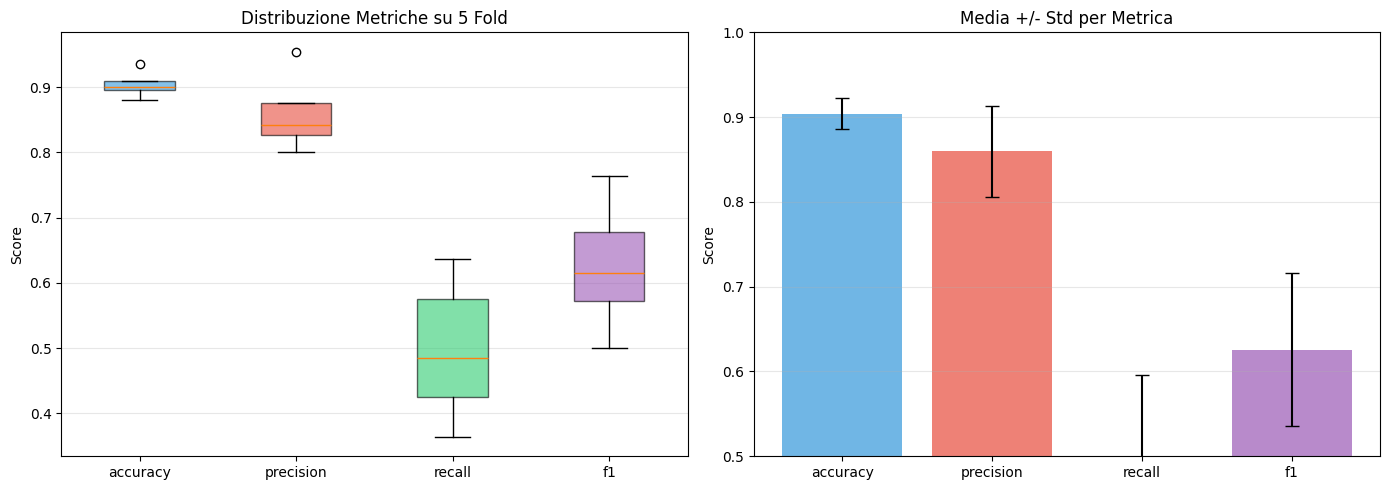


RACCOMANDAZIONE: Riporta sempre media E std di ogni metrica!


In [13]:
# === ESERCIZIO 6: Cross-Validation Multi-Metrica ===
# Perche: valutiamo un modello su piu metriche contemporaneamente
#         usando cross_validate

from sklearn.model_selection import cross_validate

# Dataset leggermente sbilanciato
X_cv, y_cv = make_classification(
    n_samples=1000, n_features=10, n_informative=6,
    weights=[0.85, 0.15], flip_y=0.05, random_state=42
)

model_cv = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Definizione metriche multiple
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Cross-validation
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_cv = cross_validate(
    model_cv, X_cv, y_cv, cv=cv_strat, scoring=scoring, return_train_score=False
)

# --- MICRO-CHECKPOINT ---
assert 'test_accuracy' in results_cv, "Devono esserci risultati per accuracy"
assert len(results_cv['test_f1']) == 5, "Devono esserci 5 scores per metrica"
print("Micro-checkpoint 1: Cross-validation multi-metrica completata")

print("=" * 70)
print("RISULTATI CROSS-VALIDATION MULTI-METRICA")
print("=" * 70)

metrics_names = ['accuracy', 'precision', 'recall', 'f1']
metrics_data = {}

print(f"\n{'Fold':<6}", end='')
for m in metrics_names:
    print(f"{m:>12}", end='')
print()
print("-" * 54)

for fold in range(5):
    print(f"Fold {fold+1:<2}", end='')
    for m in metrics_names:
        val = results_cv[f'test_{m}'][fold]
        print(f"{val:>12.4f}", end='')
    print()

print("-" * 54)
print(f"{'Media':<6}", end='')
for m in metrics_names:
    mean_val = np.mean(results_cv[f'test_{m}'])
    print(f"{mean_val:>12.4f}", end='')
    metrics_data[m] = results_cv[f'test_{m}']
print()

print(f"{'Std':<6}", end='')
for m in metrics_names:
    std_val = np.std(results_cv[f'test_{m}'])
    print(f"{std_val:>12.4f}", end='')
print()

# --- MICRO-CHECKPOINT ---
print("\nMicro-checkpoint 2: Analisi completata")

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
data_to_plot = [metrics_data[m] for m in metrics_names]
bp = ax1.boxplot(data_to_plot, labels=metrics_names, patch_artist=True)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax1.set_ylabel('Score')
ax1.set_title('Distribuzione Metriche su 5 Fold')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[1]
means = [np.mean(metrics_data[m]) for m in metrics_names]
stds = [np.std(metrics_data[m]) for m in metrics_names]
x_pos = range(len(metrics_names))

bars = ax2.bar(x_pos, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics_names)
ax2.set_ylabel('Score')
ax2.set_title('Media +/- Std per Metrica')
ax2.set_ylim(0.5, 1.0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nRACCOMANDAZIONE: Riporta sempre media E std di ogni metrica!")

# SEZIONE 4 - Metodi e Funzioni

---

## Funzioni di Split

| Funzione | Modulo | Descrizione |
|----------|--------|-------------|
| train_test_split | sklearn.model_selection | Split semplice train/test |
| StratifiedKFold | sklearn.model_selection | K-Fold stratificato |
| KFold | sklearn.model_selection | K-Fold semplice |

---

## Funzioni di Cross-Validation

| Funzione | Modulo | Descrizione |
|----------|--------|-------------|
| cross_val_score | sklearn.model_selection | CV con singola metrica |
| cross_validate | sklearn.model_selection | CV con metriche multiple |

---

## Metriche di Classificazione

| Funzione | Modulo | Descrizione |
|----------|--------|-------------|
| accuracy_score | sklearn.metrics | Accuracy globale |
| precision_score | sklearn.metrics | Precision |
| recall_score | sklearn.metrics | Recall (Sensitivity) |
| f1_score | sklearn.metrics | F1-Score |
| confusion_matrix | sklearn.metrics | Matrice di confusione |
| classification_report | sklearn.metrics | Report completo |

---

## Parametri train_test_split

| Parametro | Default | Descrizione |
|-----------|---------|-------------|
| test_size | 0.25 | Frazione per il test |
| random_state | None | Seed per riproducibilita |
| stratify | None | Mantiene proporzioni classi |
| shuffle | True | Mescola prima di dividere |

---

## Parametri StratifiedKFold

| Parametro | Default | Descrizione |
|-----------|---------|-------------|
| n_splits | 5 | Numero di fold |
| shuffle | False | Mescola prima di dividere |
| random_state | None | Seed per riproducibilita |

---

## Pattern di Utilizzo

```python
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Cross-Validation singola metrica
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")

# Cross-Validation multi-metrica
from sklearn.model_selection import cross_validate
scoring = {'acc': 'accuracy', 'f1': 'f1', 'prec': 'precision', 'rec': 'recall'}
results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Metriche singole
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")
```

# SEZIONE 5 - Glossario

---

| Termine | Definizione |
|---------|-------------|
| Training Set | Dati usati per addestrare il modello |
| Test Set | Dati usati per valutare la performance finale |
| Validation Set | Dati usati per tuning degli iperparametri |
| Generalizzazione | Capacita di performare bene su dati nuovi |
| Overfitting | Il modello memorizza invece di imparare |
| Cross-Validation | Tecnica di validazione con fold multipli |
| K-Fold | Divisione in K parti per cross-validation |
| Stratified | Split che mantiene le proporzioni delle classi |
| Accuracy | Frazione di predizioni corrette sul totale |
| Precision | TP / (TP + FP) - correttezza dei positivi predetti |
| Recall | TP / (TP + FN) - copertura dei positivi reali |
| F1-Score | Media armonica di Precision e Recall |
| Confusion Matrix | Tabella TN, FP, FN, TP |
| True Positive (TP) | Positivo reale predetto come positivo |
| False Positive (FP) | Negativo reale predetto come positivo |
| True Negative (TN) | Negativo reale predetto come negativo |
| False Negative (FN) | Positivo reale predetto come negativo |
| Dataset Sbilanciato | Dataset con classi non equamente rappresentate |
| random_state | Seed per garantire riproducibilita |
| Fold | Sottinsieme dei dati in cross-validation |

# SEZIONE 6 - Errori Comuni

---

| Errore | Problema | Soluzione |
|--------|----------|-----------|
| Usare solo accuracy | Fuorviante con classi sbilanciate | Usare F1, Precision, Recall |
| Singolo train/test split | Risultati dipendono dal random_state | Usare cross-validation |
| Non usare stratify | Proporzioni classi non mantenute | stratify=y per classificazione |
| Testare sul training set | Misura memorizzazione, non generalizzazione | Sempre separare train e test |
| Non riportare std | Nasconde instabilita del modello | Riportare media +/- std |
| Non controllare bilanciamento | Metriche inappropriate | Controllare np.bincount(y) |
| random_state non fissato | Risultati non riproducibili | Fissare random_state |
| Usare test set per tuning | Data leakage | Usare validation set separato |
| Cross-validation con K troppo basso | Stima instabile | Usare K >= 5 |
| Ignorare la confusion matrix | Perdere dettagli sugli errori | Sempre analizzare CM |

# SEZIONE 7 - Conclusione

---

## Cosa Abbiamo Imparato

In questa lezione abbiamo affrontato il tema fondamentale della validazione dei modelli:

1. Un singolo train/test split e inaffidabile (dipende dal random_state)
2. La Cross-Validation risolve questo problema usando tutti i dati
3. L'Accuracy puo ingannare con dataset sbilanciati
4. Precision, Recall e F1-Score raccontano la verita

---

## Concetti Chiave

| Concetto | Cosa ricordare |
|----------|----------------|
| Train/Test Split | Semplice ma variabile |
| K-Fold CV | Robusto, usa tutti i dati |
| Accuracy | OK solo se dataset bilanciato |
| Precision | Dei positivi predetti, quanti sono veri |
| Recall | Dei positivi reali, quanti trovati |
| F1-Score | Bilancio tra Precision e Recall |

---

## Quando Usare Quale Metrica

| Scenario | Metrica |
|----------|---------|
| Dataset bilanciato | Accuracy |
| Falsi positivi costosi | Precision |
| Falsi negativi costosi | Recall |
| Bilanciamento P/R | F1-Score |

---

## Workflow di Validazione

```
1. Controlla bilanciamento classi
2. Scegli metriche appropriate
3. Usa cross-validation (K=5 o K=10)
4. Riporta media +/- std
```

---

## Prossimi Passi

Nella prossima lezione affronteremo:
- Pipeline: concatenare preprocessing + modello
- GridSearchCV: ricerca automatica degli iperparametri
- Data Leakage: errori che invalidano i risultati

# SEZIONE 8 - Checklist

---

## Prima della Validazione

- [ ] Ho controllato il bilanciamento delle classi
- [ ] Ho scelto le metriche appropriate per il mio problema
- [ ] Ho fissato random_state per riproducibilita

---

## Durante la Validazione

- [ ] Uso cross-validation invece di singolo split
- [ ] Uso stratify per mantenere proporzioni
- [ ] Calcolo piu metriche (non solo accuracy)
- [ ] Analizzo la confusion matrix

---

## Dopo la Validazione

- [ ] Riporto media E std per ogni metrica
- [ ] Interpreto i risultati nel contesto del problema
- [ ] Verifico che non ci sia data leakage

---

## Dataset Sbilanciato

- [ ] Ho identificato la classe minoritaria
- [ ] Uso F1, Precision, Recall invece di Accuracy
- [ ] Ho considerato se Precision o Recall e piu importante

---

## Report Finale

- [ ] Confusion Matrix analizzata
- [ ] Metriche con std riportate
- [ ] Interpretazione chiara dei risultati

# SEZIONE 9 - Changelog

---

| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | 2024-01-15 | Creazione iniziale del notebook |
| 2.0 | 2024-12-XX | Ristrutturazione completa secondo template a 9 sezioni |

---

## Note sulla Ristrutturazione

- Aggiunta SEZIONE 2 - Mappa Mentale con flussi decisionali
- SEZIONE 3 - Quaderno Dimostrativo con 6 esercizi pratici
- Aggiunta micro-checkpoint con assert per verifica
- Rimossi emoji secondo linee guida
- Consolidata teoria in SEZIONE 1 con 14 sottosezioni
- Aggiunta tabella metodi e funzioni
- Glossario con 20 termini chiave
- Tabella errori comuni con 10 problemi tipici